In [4]:
import pandas as pd

df = pd.read_csv('films_vn_with_content.csv')
df.set_index('Thứ Hạng', inplace=True)
df.head()

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content
Thứ Hạng,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...
2,1,Mai,https://vi.wikipedia.org/wiki/Mai_(phim),Trấn Thành,551,Phương Anh Đào,2024,Mai là một cô gái sinh ra trong một gia đình b...
3,2,Lật mặt 7: Một điều ước,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73..."
4,3,Nhà bà Nữ,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...
5,4,Bố già,https://vi.wikipedia.org/wiki/B%E1%BB%91_gi%C3...,Trấn Thành,427,"Trấn Thành, NSND Ngọc Giàu, Tuấn Trần, Ngân Ch...",2021,"Tại một xóm lao động nghèo tại Sài Gòn, có bốn..."


In [ ]:
from underthesea import word_tokenize

text = "Việt Nam là đất nước rất đẹp."
tokens = word_tokenize(text)
print(tokens)
# Output: "Việt_Nam là đất_nước rất đẹp ."


In [5]:
import nltk
#nltk.download('punkt')
import re
from nltk.stem.snowball import SnowballStemmer
#nltk.download('punkt')

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word - thực hiện tokenization (spliting token)
    tokens = [word for sent in nltk.sent_tokenize(text) #Tách thành câu
              for word in nltk.word_tokenize(sent)] # với từng câu tách thừng từ
    
    # Filter out raw tokens to remove noise - Chuẩn hóa các token (token normalization)
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)] 
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems


In [8]:
print(df['Content'].dtype)


object


In [9]:
df['Content'] = df['Content'].astype('str')

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

# Fit and transform the tfidf_vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df['Content']])

d:\Miniconda\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Miniconda\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev

In [18]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [11]:
tfidf_matrix.shape

(58, 490)

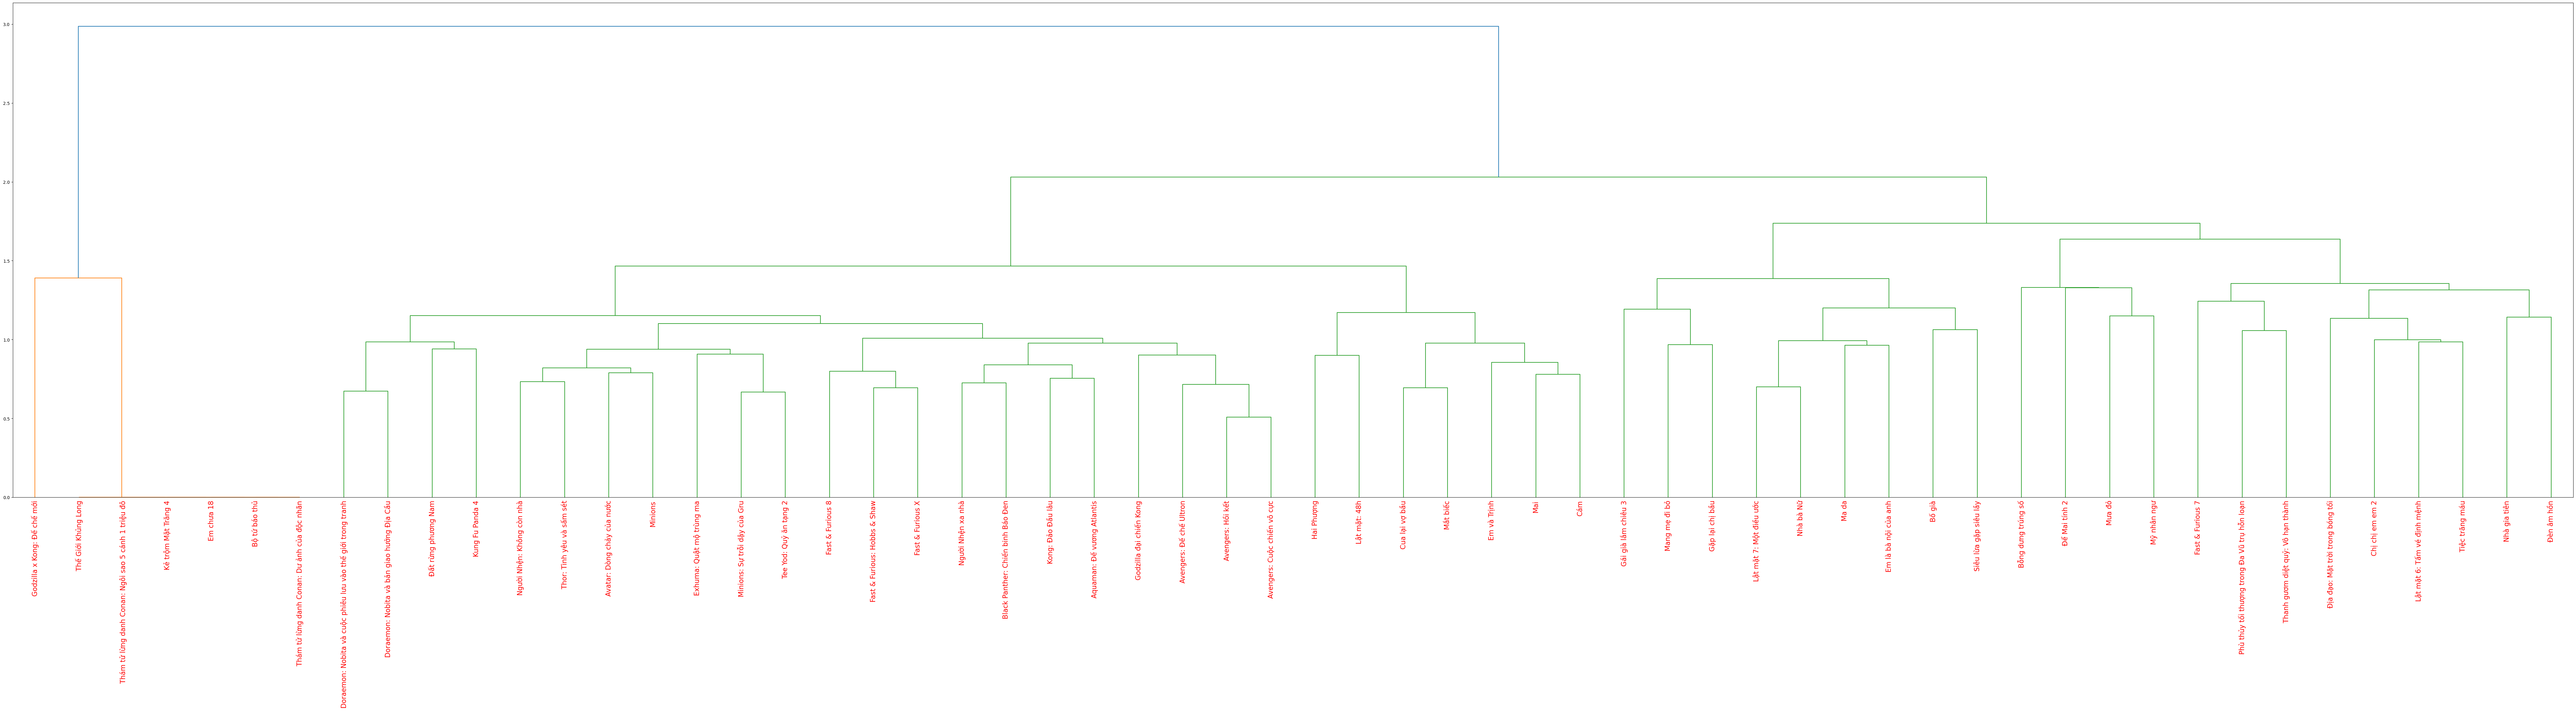

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# ===================================================================Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in df['Phim']],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

plt.savefig('dendo.png', dpi=100)
plt.show()

In [15]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [75]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
df["cluster"] = clusters
df['cluster'].value_counts() 

cluster
1    33
7     9
4     4
2     3
5     2
8     2
3     2
6     1
0     1
9     1
Name: count, dtype: int64

In [76]:
df.head()

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content,cluster
Thứ Hạng,,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...,1
2,1,Mai,https://vi.wikipedia.org/wiki/Mai_(phim),Trấn Thành,551,Phương Anh Đào,2024,Mai là một cô gái sinh ra trong một gia đình b...,5
3,2,Lật mặt 7: Một điều ước,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73...",8
4,3,Nhà bà Nữ,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...,8
5,4,Bố già,https://vi.wikipedia.org/wiki/B%E1%BB%91_gi%C3...,Trấn Thành,427,"Trấn Thành, NSND Ngọc Giàu, Tuấn Trần, Ngân Ch...",2021,"Tại một xóm lao động nghèo tại Sài Gòn, có bốn...",6


In [77]:
ClusterOfPhimMai = df[df['Phim']=='Mưa đỏ']['cluster'].values
ClusterOfPhimMai
#print any film in the same cluster as 'Mai'
phim_giong_mai = df[df['cluster']==ClusterOfPhimMai[0]] 

In [78]:
phim_giong_mai

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content,cluster
Thứ Hạng,,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...,1
6,5,Bộ tứ báo thủ,https://vi.wikipedia.org/wiki/B%E1%BB%99_t%E1%...,Trấn Thành,332,Tiểu Vy,2025,nan,1
11,9,Nhà gia tiên,https://vi.wikipedia.org/wiki/Nh%C3%A0_gia_ti%...,Huỳnh Lập,243,Huỳnh Lập,2025,Phim xoay quanh gia đình họ Huỳnh với nghề bán...,1
15,11,Phù thủy tối thượng trong Đa Vũ trụ hỗn loạn,https://vi.wikipedia.org/wiki/Ph%C3%B9_th%E1%B...,Sam Raimi,201,Benedict Cumberbatch,2022,America Chavez và một phiên bản của Bác sĩ Ste...,1
17,13,Hai Phượng,https://vi.wikipedia.org/wiki/Hai_Ph%C6%B0%E1%...,Lê Văn Kiệt,200,Ngô Thanh Vân,2019,"Hai Phượng sinh ra trong gia đình nhà võ, được...",1
18,14,Cua lại vợ bầu,https://vi.wikipedia.org/wiki/Cua_l%E1%BA%A1i_...,Nhất Trung,192,"Trấn Thành,",2019,Phim mở đầu bằng mối tình kéo dài 7 năm giữa a...,1
20,16,Bỗng dưng trúng số,https://vi.wikipedia.org/wiki/B%E1%BB%97ng_d%C...,Park Gyu-Tae,182,Go Kyung-pyo,2022,Tác phẩm lấy bối cảnh là khu biên giới quân sự...,1
21,17,Mắt biếc,https://vi.wikipedia.org/wiki/M%E1%BA%AFt_bi%E...,Victor Vũ,180,Trần Nghĩa,2019,Mắt biếc xoay quanh mối tình đơn phương của Ng...,1
22,18,Thám tử lừng danh Conan: Dư ảnh của độc nhãn,https://vi.wikipedia.org/wiki/Th%C3%A1m_t%E1%B...,Katsuya Shigehara,175,"Takayama Minami,",2025,nan,1


In [80]:
vals = df.Phim.to_list()
similarity_df = pd.DataFrame(similarity_distance, columns=vals, index=vals)

similarity_df.head()


,Mưa đỏ,Mai,Lật mặt 7: Một điều ước,Nhà bà Nữ,Bố già,Bộ tứ báo thủ,Avengers: Hồi kết,Avatar: Dòng chảy của nước,Lật mặt 6: Tấm vé định mệnh,Nhà gia tiên,...,Mỹ nhân ngư,Thế Giới Khủng Long,Gặp lại chị bầu,Black Panther: Chiến binh Báo Đen,Em là bà nội của anh,Để Mai tính 2,Em và Trịnh,Fast & Furious X,Tee Yod: Quỷ ăn tạng 2,Minions
Mưa đỏ,-2.220446e-16,7.981515e-01,0.890408,8.742666e-01,0.904040,1.0,0.655664,0.771247,0.843778,0.907436,...,0.734734,1.0,0.892722,0.696158,0.900579,0.806793,0.792004,0.813266,0.733029,0.786770
Mai,7.981515e-01,-4.440892e-16,0.470974,4.931042e-01,0.517651,1.0,0.623002,0.671734,0.583466,0.614626,...,0.695840,1.0,0.695101,0.610710,0.579705,0.744245,0.504882,0.687570,0.622364,0.640732
Lật mặt 7: Một điều ước,8.904076e-01,4.709744e-01,0.000000,3.817007e-01,0.577820,1.0,0.758597,0.746932,0.777714,0.753624,...,0.853846,1.0,0.730324,0.757564,0.475775,0.838611,0.676482,0.765757,0.736839,0.781533
Nhà bà Nữ,8.742666e-01,4.931042e-01,0.381701,-2.220446e-16,0.592421,1.0,0.699785,0.603431,0.708288,0.717087,...,0.850077,1.0,0.770567,0.701451,0.596015,0.802204,0.572219,0.795421,0.676800,0.670860
Bố già,9.040399e-01,5.176515e-01,0.577820,5.924208e-01,0.000000,1.0,0.725480,0.682455,0.689430,0.784462,...,0.832177,1.0,0.812327,0.706022,0.652197,0.767072,0.525517,0.759936,0.653915,0.739884


In [95]:
df.head(50)

,Unnamed: 0,Phim,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content,cluster
Thứ Hạng,,,,,,,,,
1,0,Mưa đỏ,https://vi.wikipedia.org/wiki/M%C6%B0a_%C4%91%...,Đặng Thái Huyền,552,"Đỗ Nhật Hoàng, Lê Hạ Anh, Steven Nguyễn, Phươn...",2025,Bộ phim kể về cuộc chiến đấu bảo vệ Thành cổ Q...,1
2,1,Mai,https://vi.wikipedia.org/wiki/Mai_(phim),Trấn Thành,551,Phương Anh Đào,2024,Mai là một cô gái sinh ra trong một gia đình b...,5
3,2,Lật mặt 7: Một điều ước,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73...",8
4,3,Nhà bà Nữ,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...,8
5,4,Bố già,https://vi.wikipedia.org/wiki/B%E1%BB%91_gi%C3...,Trấn Thành,427,"Trấn Thành, NSND Ngọc Giàu, Tuấn Trần, Ngân Ch...",2021,"Tại một xóm lao động nghèo tại Sài Gòn, có bốn...",6
6,5,Bộ tứ báo thủ,https://vi.wikipedia.org/wiki/B%E1%BB%99_t%E1%...,Trấn Thành,332,Tiểu Vy,2025,nan,1
7,6,Avengers: Hồi kết,https://vi.wikipedia.org/wiki/Avengers:_H%E1%B...,Anthony Russo,280,Robert Downey Jr.,2019,Phim khởi đầu sau sự kiện Infinity War năm 201...,4
8,7,Avatar: Dòng chảy của nước,https://vi.wikipedia.org/wiki/Avatar:_D%C3%B2n...,James Cameron,278,Sam Worthington,2022,Hơn một thập kỷ sau khi người Na'vi đẩy lùi cu...,7
9,8,Lật mặt 6: Tấm vé định mệnh,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,273,"Lý Hải, Quốc Cường,",2023,Phim kể về tấm vé số có mệnh giá 10 ngàn đồng ...,0


In [81]:
similarity_df.to_csv('sim_matrix.csv')

In [98]:
Phim = 'Ma da'
matches = similarity_df[Phim].sort_values()[1:6]
matches = matches.index.tolist()
df.set_index('Phim').loc[matches]


,Unnamed: 0,Link,Đạo diễn,Doanh thu (tỷ VNĐ),Diễn viên,Năm,Content,cluster
Phim,,,,,,,,
Lật mặt 7: Một điều ước,2,https://vi.wikipedia.org/wiki/L%E1%BA%ADt_m%E1...,Lý Hải,483,Thanh Hiền,2024,"Phim kể về cuộc sống của bà Hai, một bà lão 73...",8
Nhà bà Nữ,3,https://vi.wikipedia.org/wiki/Nh%C3%A0_b%C3%A0...,Trấn Thành,475,"Trấn Thành, Khả Như,",2023,Bộ phim xoay quanh gia đình ba thế hệ của bà N...,8
Cám,46,https://vi.wikipedia.org/wiki/C%C3%A1m_(phim),Trần Hữu Tấn,117,"Lâm Thanh Mỹ, Rima Thanh Vy,",2024,Phim Cám là một phiên bản táo bạo và rùng rợn ...,5
Em là bà nội của anh,52,https://vi.wikipedia.org/wiki/Em_l%C3%A0_b%C3%...,Phan Gia Nhật Linh,102,Miu Lê,2015,"Chuyện phim xoay quanh bà Đại (NSƯT Minh Đức),...",1
Gái già lắm chiêu 3,25,https://vi.wikipedia.org/wiki/G%C3%A1i_gi%C3%A...,Bảo Nhân,165,"Ninh Dương Lan Ngọc,",2020,"Hết phần 2, quan hệ giữa Ms Q (Ninh Dương Lan ...",1
